In [8]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam,Adagrad,RMSprop
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [4]:
# load dataset
(x_train,y_train),(x_test,y_test)  = fashion_mnist.load_data()
x_train = x_train.reshape(-1,28*28).astype(np.float32)/255.0
x_test =  x_test.reshape(-1,28*28).astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [26]:
n_input = 28*28
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10
batch_size = 256
n_epoch=2
k=2

In [27]:
def buildModel():
    model = Sequential()
    model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2,activation='relu'))
    model.add(Dense(units=n_hidden3,activation='relu'))
    model.add(Dense(units=n_hidden4,activation='relu'))
    model.add(Dense(units=n_output,activation='softmax'))
    return model

In [28]:
temp = pd.DataFrame({'data' : range(10,30)})
list(KFold(k).split(temp))

[(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
  array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
  array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))]

In [14]:
# cross_validate(모델, x,y, scoring='accuray', cv=5)

In [31]:
def cross_val(opt):
    accuracy = []
    for train_index, val_index in KFold(k).split(x_train):
        xtrain, xval = x_train[train_index], x_train[val_index]
        ytrain, yval = y_train[train_index], y_train[val_index] 
        model = buildModel()
        model.compile(loss = tf.keras.losses.categorical_crossentropy,optimizer=opt,metrics=['accuracy'])
        model.fit(xtrain,ytrain,batch_size=batch_size,epochs=n_epoch,verbose=0)
        accuracy.append(model.evaluate(xval,yval))
    return accuracy

In [32]:
# 4개 모델에 대해서 교차 검증을 수행
sgd = cross_val(SGD())
adam = cross_val(Adam())
adagrad = cross_val(Adagrad())
rmsprop = cross_val(RMSprop())

938/938 [==============================] - 4s 4ms/step - loss: 0.4507 - accuracy: 0.8336


In [45]:
print(np.array(sgd).mean(axis=0)[1])
print(np.array(adam).mean(axis=0)[1])
print(np.array(adagrad).mean(axis=0)[1])
print(np.array(rmsprop).mean(axis=0)[1])

0.7115333378314972
0.8594333231449127
0.650600016117096
0.7642666697502136


In [34]:
adam

[[0.39375320076942444, 0.8553000092506409],
 [0.38474294543266296, 0.8635666370391846]]

<AxesSubplot:>

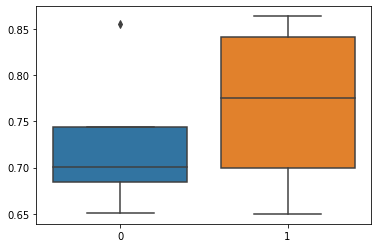

In [76]:
import seaborn as sns
temp = pd.DataFrame(data = [
[i[1] for i in sgd],
[i[1] for i in adam],
[i[1] for i in adagrad],
[i[1] for i in rmsprop]
]
            ).T
temp.columns = ['sgd','adam','adagrad','rmsprop']
temp.T
sns.boxplot(data=temp.T)

<AxesSubplot:>

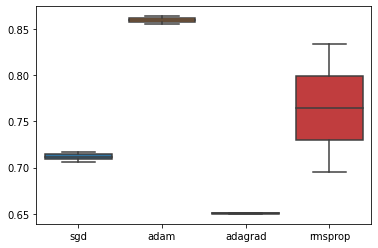

In [79]:
sns.boxplot(data=temp)